In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

1. 내적 일관성 분석 (크론바흐 알파)
Cronbach's Alpha: 0.8234
Cronbach's Alpha for 어휘: 0.5784
'어휘' 영역의 크론바흐 알파는 0.5784로, 내적 일관성이 적절한 수준입니다.
Cronbach's Alpha for 문법: 0.5422
'문법' 영역의 크론바흐 알파는 0.5422로, 내적 일관성이 적절한 수준입니다.
Cronbach's Alpha for 쓰기: 0.1294
'쓰기' 영역의 크론바흐 알파는 0.1294로, 내적 일관성이 낮습니다. 문항 검토가 필요할 수 있습니다.
Cronbach's Alpha for 읽기: 0.2888
'읽기' 영역의 크론바흐 알파는 0.2888로, 내적 일관성이 낮습니다. 문항 검토가 필요할 수 있습니다.
Cronbach's Alpha for 문화: 0.5458
'문화' 영역의 크론바흐 알파는 0.5458로, 내적 일관성이 적절한 수준입니다.

2. 테스트-재테스트 신뢰도 분석
재테스트 데이터가 없어 테스트-재테스트 신뢰도 분석을 수행할 수 없습니다.

3. 구인 타당도 분석


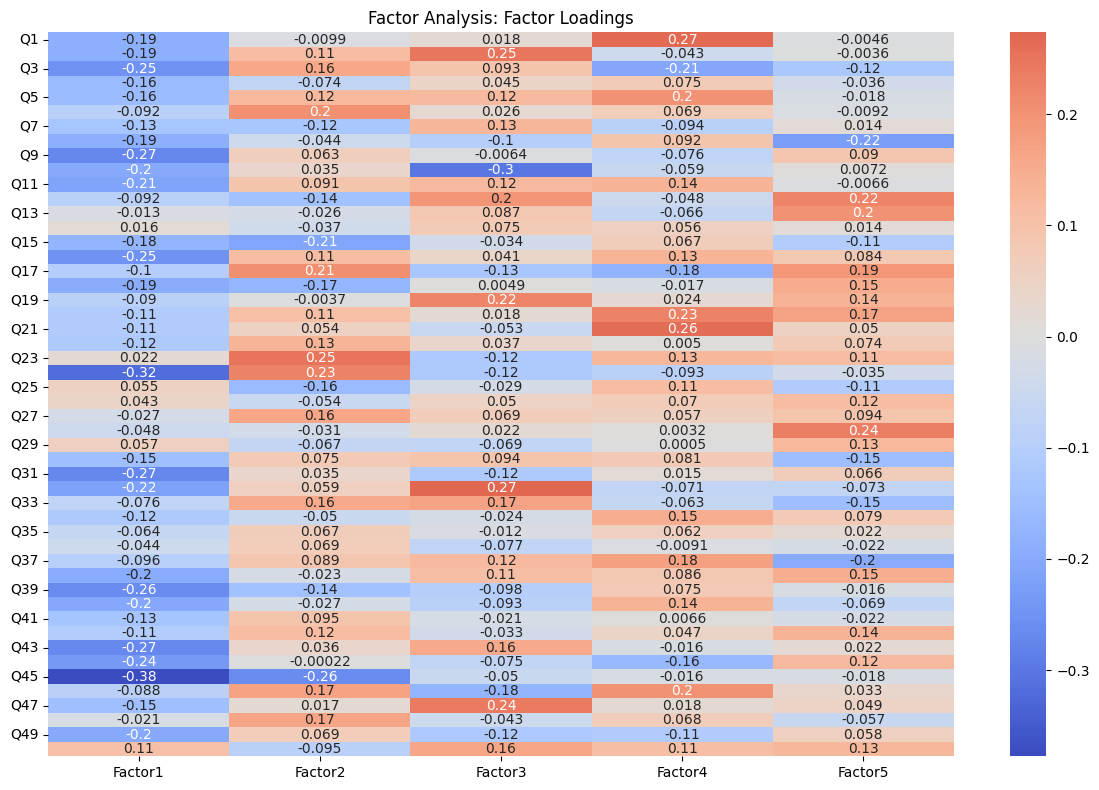

요인 분석 결과 해석:

Factor1에서 높은 적재량을 보이는 문항들:
[]
Factor1은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.

Factor2에서 높은 적재량을 보이는 문항들:
[]
Factor2은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.

Factor3에서 높은 적재량을 보이는 문항들:
[]
Factor3은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.

Factor4에서 높은 적재량을 보이는 문항들:
[]
Factor4은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.

Factor5에서 높은 적재량을 보이는 문항들:
[]
Factor5은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.


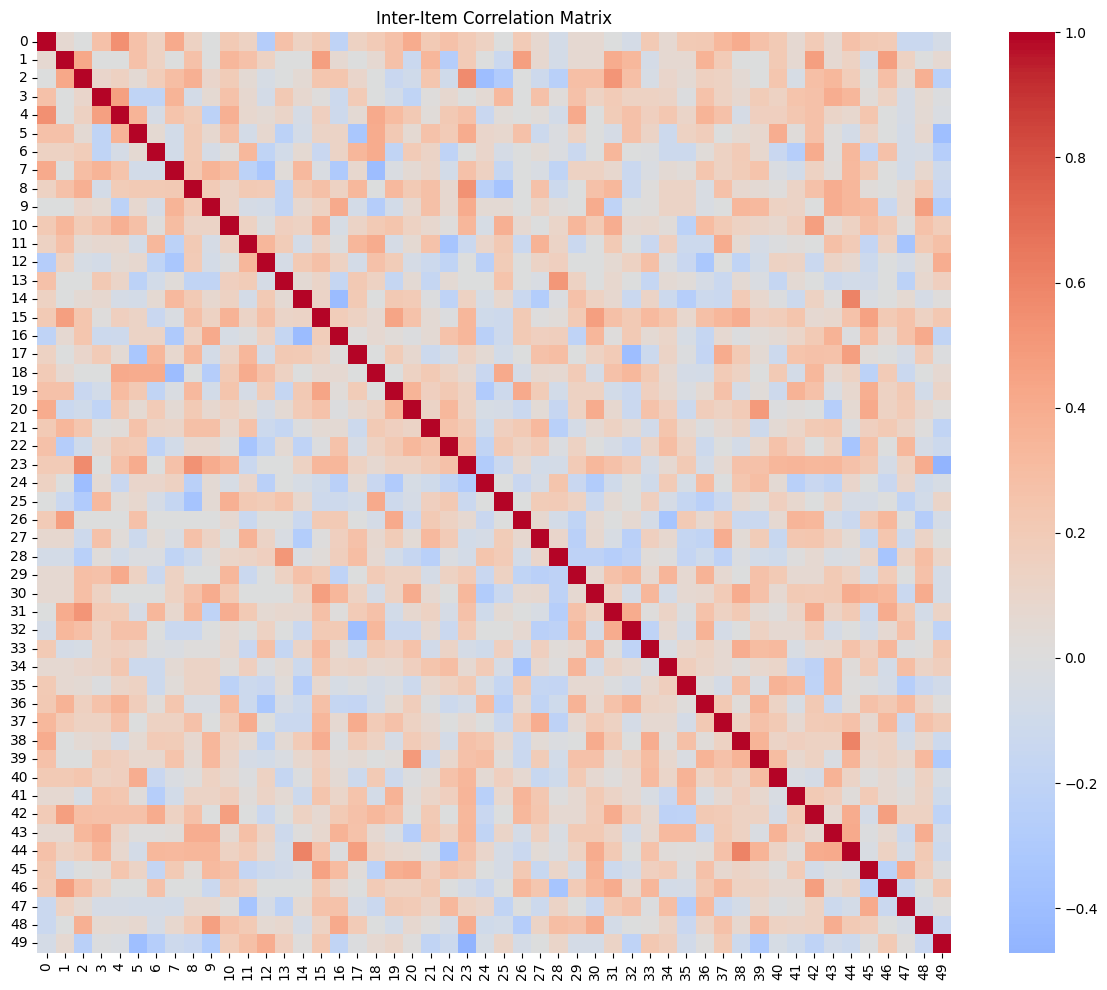

상관 행렬 해석:
상관계수가 0.7을 초과하는 문항 쌍들:
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index: []

[0 rows x 50 columns]

4. 준거 타당도 분석
외부 기준 데이터가 없어 준거 타당도 분석을 수행할 수 없습니다.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df_questions = pd.read_csv('../exam1.csv')
df_responses = pd.read_csv('../응답_데이터.csv')

# 응답 데이터 준비
responses = df_responses['OX리스트'].apply(lambda x: pd.Series([1 if i == 'O' else 0 for i in x]))

# 1. 크론바흐 알파 계수를 통한 내적 일관성 분석
def cronbach_alpha():
    item_count = responses.shape[1]
    item_variances = responses.var(axis=0)
    total_variance = responses.sum(axis=1).var()
    
    alpha = (item_count / (item_count - 1)) * (1 - (item_variances.sum() / total_variance))
    print(f"Cronbach's Alpha: {alpha:.4f}")
    
    # 영역별 크론바흐 알파 계수 계산 및 해석
    for area in df_questions['평가영역'].unique():
        area_questions = df_questions[df_questions['평가영역'] == area]['문제번호']
        area_responses = responses.iloc[:, area_questions - 1]
        
        item_count = area_responses.shape[1]
        item_variances = area_responses.var(axis=0)
        total_variance = area_responses.sum(axis=1).var()
        
        area_alpha = (item_count / (item_count - 1)) * (1 - (item_variances.sum() / total_variance))
        print(f"Cronbach's Alpha for {area}: {area_alpha:.4f}")
        
        # 해석 추가
        if area_alpha > 0.7:
            print(f"'{area}' 영역의 크론바흐 알파는 {area_alpha:.4f}로, 내적 일관성이 매우 높습니다.")
        elif area_alpha > 0.5:
            print(f"'{area}' 영역의 크론바흐 알파는 {area_alpha:.4f}로, 내적 일관성이 적절한 수준입니다.")
        else:
            print(f"'{area}' 영역의 크론바흐 알파는 {area_alpha:.4f}로, 내적 일관성이 낮습니다. 문항 검토가 필요할 수 있습니다.")

# 2. 테스트-재테스트 신뢰도 분석 (데이터 있을 경우)
def test_retest_reliability(retest_data=None):
    if retest_data is None:
        print("재테스트 데이터가 없어 테스트-재테스트 신뢰도 분석을 수행할 수 없습니다.")
        return
    
    # 재테스트 데이터가 있다고 가정하고 상관계수 계산
    correlation, _ = stats.pearsonr(df_responses['점수'], retest_data['점수'])
    print(f"Test-Retest Reliability (Pearson correlation): {correlation:.4f}")
    
    # 해석 추가
    if correlation > 0.7:
        print(f"테스트-재테스트 상관계수는 {correlation:.4f}로, 높은 신뢰도를 보여줍니다.")
    elif correlation > 0.5:
        print(f"테스트-재테스트 상관계수는 {correlation:.4f}로, 적절한 수준의 신뢰도를 보여줍니다.")
    else:
        print(f"테스트-재테스트 상관계수는 {correlation:.4f}로, 신뢰도가 낮아 문항 검토가 필요할 수 있습니다.")

# 3. 구인 타당도 분석
def construct_validity():
    # 요인 분석을 통한 구인 타당도 분석
    fa = FactorAnalysis(n_components=5, random_state=42)
    fa.fit(responses)
    
    loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor{i+1}' for i in range(5)])
    loadings.index = [f'Q{i+1}' for i in range(responses.shape[1])]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('Factor Analysis: Factor Loadings')
    plt.tight_layout()
    plt.show()
    
    # 요인 적재량 해석 추가
    print("요인 분석 결과 해석:")
    for factor in loadings.columns:
        high_loadings = loadings[loadings[factor] > 0.5]
        print(f"\n{factor}에서 높은 적재량을 보이는 문항들:")
        print(high_loadings.index.tolist())
        if len(high_loadings) > 0:
            print(f"{factor}은(는) 주로 위 문항들에 의해 설명됩니다. 이 요인들은 강한 관계를 보이는 문항들에 의해 정의됩니다.")
        else:
            print(f"{factor}은(는) 주요 문항과의 강한 관계가 없으므로 추가 검토가 필요합니다.")

    # 상관 행렬을 통한 구인 타당도 분석
    correlation_matrix = responses.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Inter-Item Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # 상관 행렬 해석 추가
    print("상관 행렬 해석:")
    high_corr_pairs = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1)]
    print(f"상관계수가 0.7을 초과하는 문항 쌍들:\n{high_corr_pairs.dropna(how='all')}")

# 4. 준거 타당도 분석 (외부 기준이 있을 경우)
def criterion_validity(external_criterion=None):
    if external_criterion is None:
        print("외부 기준 데이터가 없어 준거 타당도 분석을 수행할 수 없습니다.")
        return
    
    # 외부 기준이 있다고 가정하고 상관 분석 및 회귀 분석 수행
    correlation, _ = stats.pearsonr(df_responses['점수'], external_criterion)
    print(f"Criterion Validity (Pearson correlation): {correlation:.4f}")
    
    # 단순 선형 회귀 분석
    X = df_responses['점수'].values.reshape(-1, 1)
    y = external_criterion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    print(f"Regression coefficient: {model.coef_[0]:.4f}")
    print(f"R-squared: {model.score(X_test, y_test):.4f}")
    
    # 해석 추가
    if correlation > 0.7:
        print("준거 타당도가 매우 높습니다. 해당 문항이 외부 기준과 강하게 관련이 있음을 보여줍니다.")
    elif correlation > 0.5:
        print("준거 타당도가 적절한 수준입니다.")
    else:
        print("준거 타당도가 낮습니다. 외부 기준과의 관계가 약할 수 있으며 문항 검토가 필요합니다.")

    # 산점도 및 회귀선
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    plt.xlabel('Test Score')
    plt.ylabel('External Criterion')
    plt.title('Criterion Validity: Test Score vs External Criterion')
    plt.tight_layout()
    plt.show()

# 분석 실행
print("1. 내적 일관성 분석 (크론바흐 알파)")
cronbach_alpha()

print("\n2. 테스트-재테스트 신뢰도 분석")
test_retest_reliability()  # 재테스트 데이터가 없으므로 메시지만 출력됨

print("\n3. 구인 타당도 분석")
construct_validity()

print("\n4. 준거 타당도 분석")
criterion_validity()  # 외부 기준 데이터가 없으므로 메시지만 출력됨


```
1. 내적 일관성 분석 (크론바흐 알파)
Cronbach's Alpha: 0.8234
Cronbach's Alpha for 어휘: 0.5784
Cronbach's Alpha for 문법: 0.5422
Cronbach's Alpha for 쓰기: 0.1294
Cronbach's Alpha for 읽기: 0.2888
Cronbach's Alpha for 문화: 0.5458
```

### **1. 크론바흐 알파 계수에 대한 설명 및 해석:**

**크론바흐 알파(Cronbach's Alpha)**는 내적 일관성, 즉 문항들이 동일한 개념을 얼마나 일관되게 측정하는지 평가하는 지표입니다. 알파 값은 0과 1 사이에 있으며, 값이 높을수록 문항들이 일관되게 측정된다고 판단할 수 있습니다.

- **0.7 이상**: 일반적으로 수용 가능한 수준으로 간주됩니다.
- **0.8 이상**: 매우 좋은 신뢰도를 의미합니다.
- **0.6 이하**: 신뢰도가 낮음을 의미하며, 문항들이 일관되지 않을 수 있습니다.

---

### **전체 시험의 크론바흐 알파 (0.8234):**
- 전체 시험의 크론바흐 알파 값이 **0.8234**로 나타났습니다. 이는 전체 시험 문항들이 **일관되게** 측정되고 있음을 나타내며, 시험의 내적 일관성이 높다는 것을 의미합니다. 따라서, 전체적으로 시험의 신뢰도가 매우 좋은 수준이라고 평가할 수 있습니다.

---

### **영역별 크론바흐 알파 계수 해석:**

1. **어휘 (0.5784)**:
   - 어휘 영역의 크론바흐 알파 값은 **0.5784**입니다. 이는 신뢰도가 중간 정도로, 어휘 문항들이 동일한 개념을 측정하는 데 있어 다소 일관성이 부족할 수 있음을 시사합니다.
   - 문항의 난이도나 측정 개념의 차이로 인해 알파 값이 낮을 수 있으며, 어휘 영역의 문항 구성이 좀 더 개선될 필요가 있을 수 있습니다.

2. **문법 (0.5422)**:
   - 문법 영역의 크론바흐 알파 값은 **0.5422**로, 신뢰도가 비교적 낮은 편입니다. 이는 문법 영역에서 문항들 간의 일관성이 다소 떨어진다는 것을 의미할 수 있습니다.
   - 문항들이 다루는 개념이 서로 다르거나 문항의 난이도 차이가 클 경우 이러한 결과가 나올 수 있습니다. 문법 영역의 문항들을 조정하거나 재구성할 필요가 있을 수 있습니다.

3. **쓰기 (0.1294)**:
   - 쓰기 영역의 크론바흐 알파 값은 **0.1294**로 매우 낮습니다. 이는 쓰기 영역의 문항들이 **서로 일관되지 않다**는 것을 나타냅니다.
   - 쓰기 영역은 주관적인 평가 기준이 있을 수 있어 문항 간의 일관성이 떨어질 수 있지만, 이 경우는 신뢰도가 매우 낮기 때문에 문항 구성이나 채점 기준의 개선이 필요할 수 있습니다.

4. **읽기 (0.2888)**:
   - 읽기 영역의 크론바흐 알파 값은 **0.2888**로 나타났습니다. 이는 읽기 문항 간에 일관성이 낮다는 것을 의미합니다. 읽기 문항들 역시 동일한 개념을 측정하지 않거나 문항 간 난이도 차이가 클 수 있습니다.
   - 읽기 영역도 문항의 재구성이나 난이도 조절이 필요할 수 있습니다.

5. **문화 (0.5458)**:
   - 문화 영역의 크론바흐 알파 값은 **0.5458**로 중간 수준입니다. 문항들 간의 일관성이 일부 유지되고 있지만, 완전히 일관적이지 않음을 나타냅니다. 문항 간의 상호작용이나 측정 개념에 대한 추가적인 검토가 필요할 수 있습니다.

---

### **결론 및 조언:**
- 전체 시험은 내적 일관성이 높아 **신뢰도**가 좋습니다. 이는 시험 전체가 일관되게 특정 능력을 측정하고 있음을 의미합니다.
- 하지만 각 영역별로 신뢰도의 차이가 있으며, 특히 **쓰기**와 **읽기** 영역에서 신뢰도가 매우 낮은 점은 개선이 필요합니다.
  - 문항의 재구성, 난이도 조절, 혹은 채점 기준의 명확화 등을 통해 신뢰도를 개선할 수 있습니다.
- 어휘, 문법, 문화 영역은 중간 정도의 신뢰도를 보이므로, 문항 구성이나 난이도를 좀 더 세심하게 조정할 필요가 있을 수 있습니다.

신뢰도를 평가하는 방법에는 여러 가지가 있으며, 각 방법은 데이터의 특성에 따라 적절하게 선택될 수 있습니다. 신뢰도 분석은 측정 도구나 테스트의 일관성, 신뢰성을 평가하는 데 사용됩니다. 대표적인 신뢰도 분석 방법들을 소개하면 다음과 같습니다.

### 1. **크론바흐 알파(Cronbach's Alpha)**
   - **설명:** 각 문항이 전체 테스트에서 일관되게 측정되고 있는지 평가하는 방법입니다. 특히, 문항들이 서로 얼마나 높은 상관을 가지는지를 확인하는 내적 일관성을 평가합니다.
   - **적용:** Likert 척도나 설문조사와 같은 심리 측정 도구에서 많이 사용됩니다.
   - **범위 해석:**
     - 0.8 이상: 매우 높은 신뢰도
     - 0.7~0.8: 수용 가능한 신뢰도
     - 0.6~0.7: 다소 낮은 신뢰도
     - 0.6 미만: 낮은 신뢰도, 개선 필요

### 2. **테스트-재테스트 신뢰도(Test-Retest Reliability)**
   - **설명:** 동일한 테스트를 동일한 대상에게 일정 시간 후에 반복하여 실시하고, 두 결과 간의 상관관계를 측정하여 일관성을 평가하는 방법입니다.
   - **적용:** 시간 경과에 따른 측정값의 안정성을 평가하고자 할 때 사용됩니다.
   - **상관 계수 해석:**
     - 0.8 이상: 높은 신뢰도
     - 0.7~0.8: 수용 가능한 신뢰도
     - 0.6~0.7: 신뢰도가 낮음
     - 0.6 미만: 매우 낮은 신뢰도

### 3. **교차 신뢰도(Split-Half Reliability)**
   - **설명:** 테스트를 두 개의 하위 테스트로 나누고(예: 짝수/홀수 문항), 각 부분 간의 상관관계를 통해 신뢰도를 평가합니다.
   - **적용:** 전체 테스트의 길이를 줄이거나, 테스터가 다른 방식으로 평가된 두 결과를 비교할 때 사용합니다.
   - **Spearman-Brown 공식:** 나누어진 두 테스트 간의 상관관계를 통해 전체 테스트의 신뢰도를 추정하는 공식입니다.

### 4. **평균 상관계수(Average Inter-Item Correlation)**
   - **설명:** 각 문항 간의 상관관계를 평균 내어 측정 도구의 신뢰성을 평가하는 방법입니다.
   - **적용:** 문항들 간의 상호 연관성을 평가하는데 유용합니다.
   - **상관 계수 해석:** 상관 계수가 높을수록 문항들이 비슷한 것을 측정하고 있음을 의미합니다.

### 5. **평균 분할 신뢰도(Coefficient Omega 또는 McDonald's Omega)**
   - **설명:** 크론바흐 알파의 대안으로 제안된 방법으로, 크론바흐 알파가 가정하는 동일한 분산을 가지지 않는 경우에도 신뢰도를 평가할 수 있는 방법입니다. 분산 구조에 민감하여 알파보다 더 신뢰도에 유리할 수 있습니다.
   - **적용:** 특히 다차원적인 설문 문항에 대해 더 정교한 신뢰도 추정치를 제공하는 데 사용됩니다.
   - **해석:** 0.8 이상일 때 매우 신뢰할 수 있는 결과로 간주됩니다.

### 6. **상호 평가자 신뢰도(Inter-Rater Reliability, IRR)**
   - **설명:** 여러 평가자가 동일한 대상을 평가할 때, 평가자 간의 일관성을 측정하는 방법입니다. Cohen’s Kappa, Fleiss’ Kappa, ICC(Intraclass Correlation Coefficient) 등이 사용됩니다.
   - **적용:** 평가자들 간의 일관성 평가 시 유용합니다.
   - **해석:** 평가자 간의 일치율이 높을수록 신뢰도가 높다고 판단합니다.

### 7. **내적 일관성 지수(Coefficient H)**
   - **설명:** 내적 일관성을 평가하는 또 다른 지수로, 각 문항이 전체 테스트에서 얼마나 중요한 역할을 하는지 측정합니다.
   - **적용:** 각 문항의 중요도를 평가하는 데 유용합니다.

### 8. **위계적 신뢰도(Hierarchical Reliability)**
   - **설명:** 위계적 구조(다중 요인 모델)를 가진 측정 도구의 신뢰도를 평가하는 방법입니다. 크론바흐 알파와 같은 단일 지표보다 더 정교한 신뢰도 평가가 가능합니다.
   - **적용:** 다차원적인 테스트 또는 측정 도구의 신뢰도를 평가할 때 사용됩니다.

### 9. **컴포지트 신뢰도(Composite Reliability)**
   - **설명:** 구조방정식 모델(SEM)에서 사용하는 신뢰도 평가 지표로, 요인 분석을 통해 추정된 잠재 변수의 측정 정확도를 평가합니다.
   - **적용:** 구조방정식 모델을 기반으로 하는 신뢰도 분석에서 많이 사용됩니다.

### 10. **Kuder-Richardson Formula 20 (KR-20)**
   - **설명:** 이항 응답(예: 정답/오답) 데이터에서 신뢰도를 평가하는 방법입니다. 크론바흐 알파와 유사하지만, 이항 데이터를 사용하는 경우에 적합합니다.
   - **적용:** 시험 또는 퀴즈에서 이항 응답(정답/오답)으로 이루어진 데이터의 신뢰도를 평가하는 데 적합합니다.

이러한 신뢰도 분석 방법은 각각의 분석 목적에 맞춰 사용될 수 있습니다. 여러 신뢰도 지표를 함께 사용하면 테스트 도구의 신뢰성을 더 정확하게 평가할 수 있습니다.

구인 타당도(Construct Validity)는 특정 테스트가 측정하고자 하는 추상적 개념이나 구인을 얼마나 잘 측정하는지를 평가하는 과정입니다. 구인은 추상적인 개념이나 이론적 개념(예: 지능, 성격, 능력 등)을 말하며, 구인 타당도는 이 개념이 측정 도구에 의해 제대로 측정되고 있는지를 확인하는 데 사용됩니다.

구인 타당도 분석에서는 주로 **요인 분석(Factor Analysis)** 또는 **상관 행렬(Correlation Matrix)**을 사용하여 각 문항이 해당 구인과 얼마나 밀접하게 관련이 있는지를 평가합니다.

### 구인 타당도 분석에서 사용된 방법 설명:

#### 1. **요인 분석(Factor Analysis)**

요인 분석은 관찰된 변수들(질문 또는 문항) 간의 상관관계를 바탕으로 여러 변수를 설명할 수 있는 **잠재적인 구인(요인, Factors)**을 도출하는 통계 기법입니다. 요인 분석을 통해 다음과 같은 질문에 답할 수 있습니다.

- 각 문항이 특정 구인과 얼마나 밀접하게 관련이 있는가?
- 다양한 구인을 설명하는 데 적합한 문항들이 그룹화되는가?

**코드 설명:**
- `fa = FactorAnalysis(n_components=5)`는 5개의 요인을 찾기 위해 요인 분석을 수행합니다.
- **요인 적재량(Factor Loadings)**은 각 문항이 어떤 요인과 관련 있는지를 나타냅니다. 요인 적재량이 클수록 해당 문항이 해당 요인과 더 밀접하게 관련이 있다는 의미입니다.
- 요인 적재량은 **히트맵(heatmap)**으로 시각화하여 어떤 문항이 특정 요인에 강하게 영향을 미치는지 확인할 수 있습니다.

**요인 분석의 목적:**
- 각 문항이 측정하고자 하는 구인과의 관계를 이해하기 위해 요인 적재량을 분석하여 구인 타당도를 평가합니다.
- 적재량이 높은 문항들은 해당 요인을 잘 설명하는 반면, 낮거나 상관이 없는 문항들은 해당 요인과의 관계가 약함을 의미합니다.

#### 2. **상관 행렬(Correlation Matrix)**

상관 행렬은 각 문항 간의 상관관계를 평가하는 데 사용됩니다. 이를 통해 다음과 같은 정보를 얻을 수 있습니다.

- **문항 간의 상관성:** 상관 행렬을 통해 서로 연관성이 높은 문항들이 같은 구인을 측정하고 있는지를 확인합니다.
- **문항의 일관성:** 상관계수가 높은 문항들은 일관성 있게 같은 구인을 측정하고 있을 가능성이 높습니다.

**코드 설명:**
- `responses.corr()`는 문항들 간의 상관 행렬을 계산합니다.
- 상관 행렬은 **히트맵(heatmap)**으로 시각화되며, 각 문항 간의 상관계수를 시각적으로 확인할 수 있습니다.
  
**상관 행렬의 목적:**
- 높은 상관계수를 가지는 문항들은 같은 구인을 측정하고 있다고 볼 수 있습니다.
- 상관계수가 낮은 문항은 다른 구인이나 잡음을 측정할 가능성이 있으며, 이러한 문항은 테스트에서 제외하거나 수정할 필요가 있습니다.

### 요약

**구인 타당도 분석**은 측정 도구가 구체적인 구인을 잘 측정하고 있는지를 평가하는 방법입니다. 요인 분석과 상관 행렬을 통해 문항 간의 관계를 시각화하고, 각 문항이 특정 구인과 얼마나 밀접하게 관련이 있는지 확인할 수 있습니다. 이를 통해 측정 도구의 타당성을 평가하고, 구인이 명확하게 측정되고 있는지 검증하는 중요한 단계입니다.